<img style="float: right;" src="./seaborn.png" width="15%">

# Seaborn plotting - quick guide

Seaborn is a versatile Python library for creating informative and attractive statistical graphics. This notebook highlights some commonly used charts for representing biological data. Each plot has a wide range of additional options - please see https://seaborn.pydata.org/ to explore the options for each plot type. 

You may also want to visit the <a href='https://python-graph-gallery.com'> Python Graph Gallery</a> to see examples of plots, including the code to produce them. 


Some styles of chart aren't included in the Seaborn plotting library, for example at the end of this notebook you'll find a plot called a Choropleth that uses the Plotly library. Documentation for Plotly is at https://plotly.com/python/. Plotly is also great for creating interactive graphs, such as scatterplots that allow you to identify points on mouseover. 

In [2]:
# Import Seaborn, Pandas and Matplotlib libraries. Matplotlib is required to enable plot titles 
# and axis labels to be drawn, or to customise some additional parts of Seaborn figures. 

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Read in the Palmer Penguin dataset that will be used to demonstrate the plots. 
#.dropna() is used to remove rows with missing values
penguin_df=pd.read_csv("palmer_penguins.csv").dropna()

display(penguin_df)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# One numerical variable

Histograms and kernel density estimation plots (KDE) show the distribution of values in a single numerical variable. 

Histograms divide the the range of values into intervals, known as bins, and shows the number of data points that fall within each bin. 

KDE plots (sometimes just referred to as density plots) are smooth, continuous estimate of the probability density function (PDF) of a numerical variable. Unlike histograms, which display data in discrete bins, KDE plots create a smooth curve that represents the data distribution. 

/Users/graeme/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


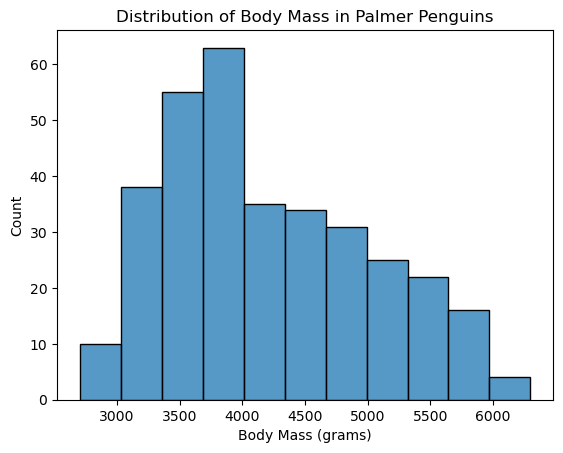

In [6]:
sns.histplot(penguin_df['body_mass_g'])
plt.xlabel('Body Mass (grams)')
plt.ylabel('Count');
plt.title('Distribution of Body Mass in Palmer Penguins');

#### Formatting plots

The the code cell above, additional commands have been added to add x and y axis labels, as well as a plot title. 

* **`plt.xlabel('label')`** : Adds a label to the x-axis of the plot. The string provided in the argument will be displayed as the label for the x-axis.
* **`plt.ylabel('label')`**: Adds a label to the y-axis of the plot. Similar to xlabel(), the string provided will be displayed as the label for the y-axis.
* **`plt.title('title')`**: Adds a title to the plot. The string provided will be displayed as the main title at the top of the plot.

/Users/graeme/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


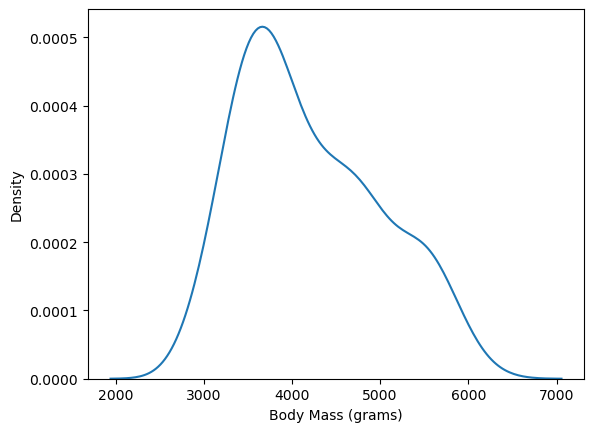

In [4]:
#KDE plot
sns.kdeplot(penguin_df['body_mass_g'])
plt.xlabel('Body Mass (grams)')
plt.ylabel('Density');

# One categorical variable and one numerical variable

### Bar Plot
Bar plots are useful for comparing quantities across different categories. For example, comparing average gene expression levels across different treatment groups. Bar plots are simple, but a downside is that they don't reveal the underlying distribution of the data points, unlike swarmplots, boxplots and violin plots. 

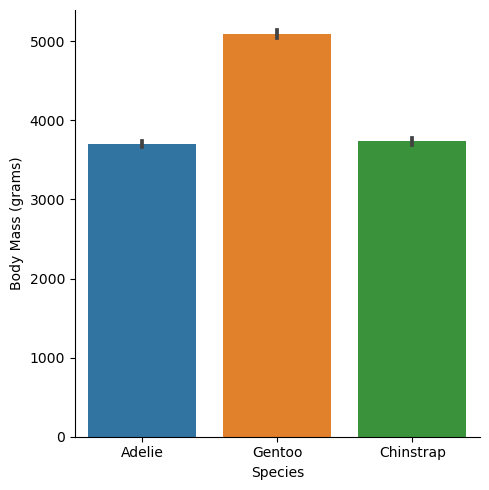

In [13]:
#Barplot
sns.catplot(x='species', y='body_mass_g', data=penguin_df, errorbar=("se"), kind='bar')
plt.xlabel('Species');
plt.ylabel('Body Mass (grams)');


### Swarmplots

Swarm plots are particularly useful where there are small number of measurements in each group because box and violin plots don't work well when there are too few points to give a clear indication of the distribution. They are a poor choice for very large datasets as it can become difficult to distinguish the dots. 

/Users/graeme/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



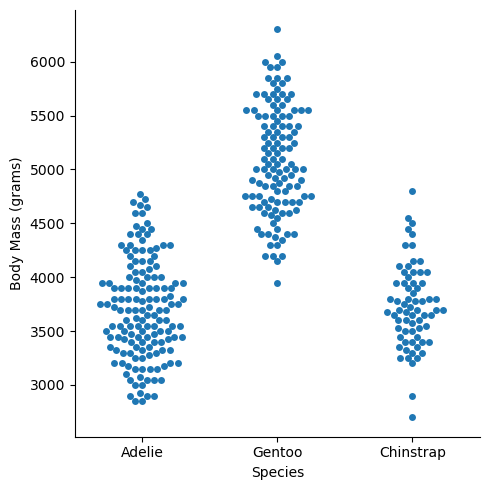

In [40]:
#Swarmplot
sns.catplot(x='species', y='body_mass_g', data=penguin_df, errorbar=("se"), kind='swarm')
plt.xlabel('Species');
plt.ylabel('Body Mass (grams)');

### Box plots

Box plots show the three quartile values of the distribution, along with extreme values. The “whiskers” extend to points that lie within 1.5 Inter-Quartile Ranges (IQRs) of the lower and upper quartile, and then observations that fall outside this range are displayed independently. They are a good choice for datasets where a large number of observations will be displayed, and they give a good overall indication of the distribution of points in each series. 

/Users/graeme/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



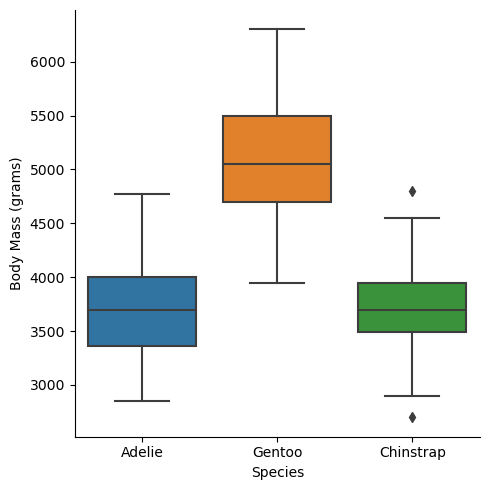

In [42]:
#Boxplot
sns.catplot(x='species', y='body_mass_g', data=penguin_df, errorbar=("se"), kind='box')
plt.xlabel('Species');
plt.ylabel('Body Mass (grams)');

# Violin plot

A violinplot effectively combines a boxplot with the kernel density estimation (KDE) plot to give a clearer visualisation of the distribution of data points. 

/Users/graeme/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



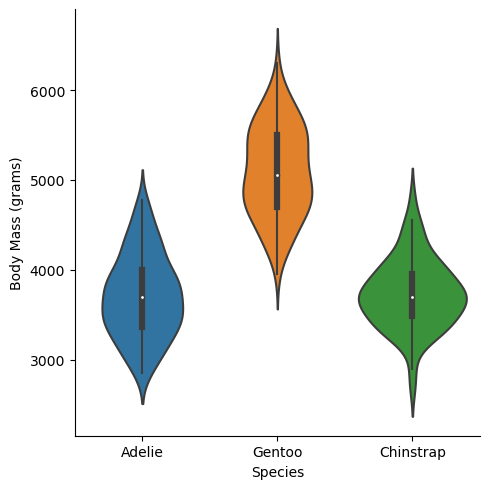

In [37]:
#Violin Plot
sns.catplot(x='species', y='body_mass_g', data=penguin_df, errorbar=("se"), kind='violin')
plt.xlabel('Species');
plt.ylabel('Body Mass (grams)');

# Two categorical variables and one numerical variable



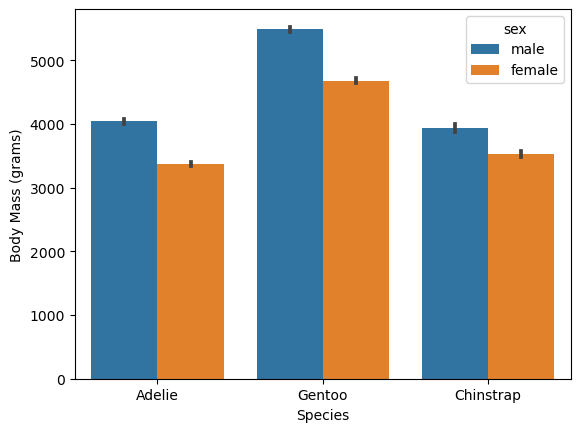

In [35]:
#Two categorical variables
#This plot uses hue to separate penguins on sex, in addition to the x value (species) 
sns.barplot(x='species', y='body_mass_g', data=penguin_df, hue='sex', errorbar=("se"))
plt.xlabel('Species');
plt.ylabel('Body Mass (grams)');


# Two numerical variables

A scatterplot allows you to visualise the relationship between two continuous numerical variables. A related plot, the lmplot, adds a regression line. 


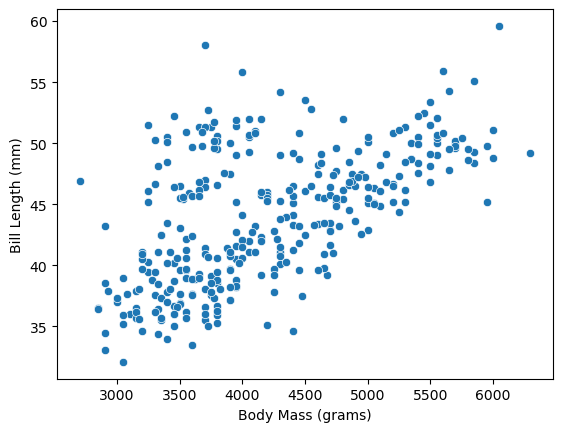

In [49]:
sns.scatterplot(data=penguin_df, x="body_mass_g", y="bill_length_mm");
plt.xlabel("Body Mass (grams)")
plt.ylabel("Bill Length (mm)");


Adding the 'hue' variable colours the points by that category (in this case by species)

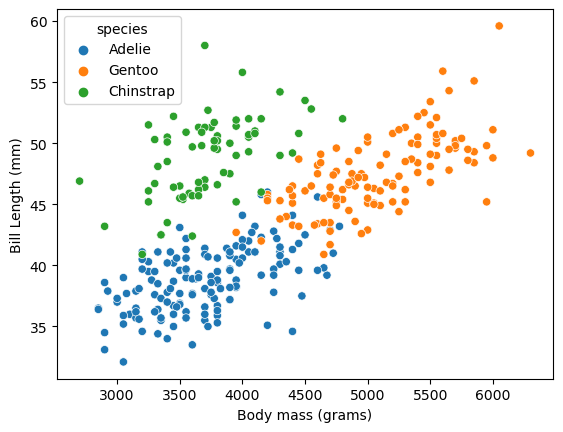

In [50]:
sns.scatterplot(data=penguin_df, x="body_mass_g", y="bill_length_mm", hue="species")
plt.xlabel('Body mass (grams)');
plt.ylabel('Bill Length (mm)');

/Users/graeme/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



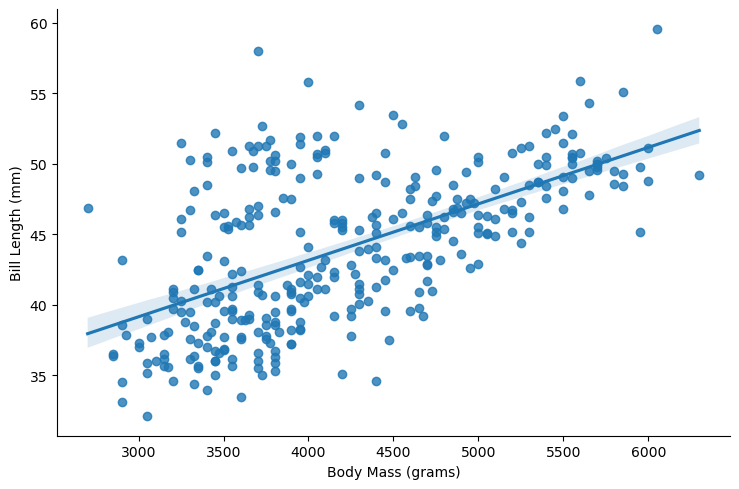

In [51]:
#lmplot - adds linear regression line
sns.lmplot(data=penguin_df, x="body_mass_g", y="bill_length_mm", aspect=1.5)
plt.xlabel("Body Mass (grams)")
plt.ylabel("Bill Length (mm)")
plt.show()

# Spatial Data: Cholopleth plots

Choropleth plots are used to display data that is divided into geographic regions, such as countries, states, or provinces. They allow for a quick comparison of the data across countries or regions and can be used to identify patterns and trends that may not be immediately obvious from looking at raw data.

Documentation for Plotly's Choropleth plots can be found at https://plotly.com/python/choropleth-maps/. The region is specified using the `scope` keyword - available scopes in this library are: 'world', 'usa', 'europe', 'asia', 'africa', 'north america', 'south america' (sorry Australasia... :( ).



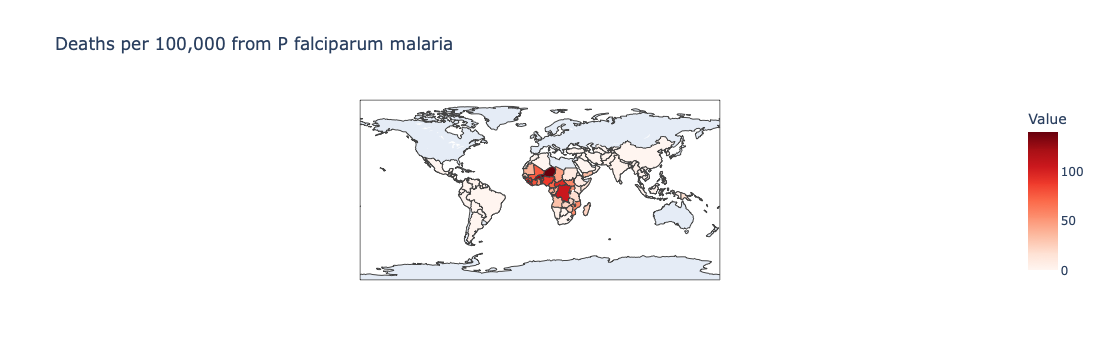

In [58]:
malaria_df=pd.read_csv('Pfalciparum-data.csv')
malaria_df

#restrict to 2017 data and mortality data only
malaria_df_2017=malaria_df.query("Year==2017 and Metric=='Mortality Rate'")
malaria_df_2017

import plotly.express as px
# Create a choropleth map
fig = px.choropleth(malaria_df_2017, locations='Name', locationmode='country names', color='Value', title='Deaths per 100,000 from P falciparum malaria', scope='world', color_continuous_scale='Reds')
fig.show()